# Task-04 - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

### Importing Libraries

In [131]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

### Data Loading

In [83]:
twitter = pd.read_csv("twitter_training.csv")
columns = ['tweet_id', 'entity', 'sentiment', 'tweet_text']
twitter.columns = columns
twitter.shape

(74681, 4)

In [84]:
twitter.head()

,tweet_id,entity,sentiment,tweet_text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


### Data Preprocessing for Visualizations

In [85]:
twitter.isnull().sum()

tweet_id        0
entity          0
sentiment       0
tweet_text    686
dtype: int64

In [86]:
twitter.dropna(inplace=True)

In [87]:
twitter.isnull().sum()

tweet_id      0
entity        0
sentiment     0
tweet_text    0
dtype: int64

In [88]:
sentiment_counts = twitter['sentiment'].value_counts()
sentiment_counts

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

In [89]:
entity_sentiment = twitter.groupby(['entity','sentiment']).size().unstack().fillna(0)
entity_sentiment

sentiment,Irrelevant,Negative,Neutral,Positive
entity,,,,
Amazon,186,575,1207,308
ApexLegends,192,591,936,634
AssassinsCreed,264,375,156,1439
Battlefield,915,464,351,586
Borderlands,240,426,597,1016
CS-GO,632,344,548,760
CallOfDuty,672,883,375,446
CallOfDutyBlackopsColdWar,569,566,352,856
Cyberpunk2077,465,385,462,950


In [90]:
entity_totals = twitter.groupby('entity').size().sort_values(ascending=False)
top_entities = entity_totals.head(10).index
entity_sentiment_top = entity_sentiment.loc[top_entities]

In [93]:
sia = SentimentIntensityAnalyzer()
twitter['compound'] = twitter['tweet_text'].apply(lambda x: sia.polarity_scores(str(x))['compound']) # Compute compound sentiment scores for each tweet

In [96]:
twitter.head()

,tweet_id,entity,sentiment,tweet_text,compound
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,-0.6908
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,-0.6908
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,-0.6908
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,-0.6908
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,-0.6908


## Visualizations

#### Overall Sentiment Distribution

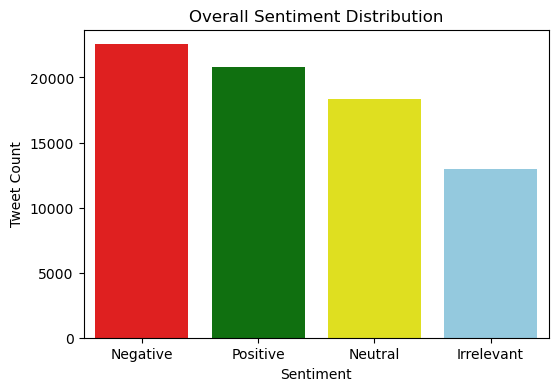

In [21]:
plt.figure(figsize=(6,4))
color = ('red','green','yellow','skyblue')
sns.barplot(x=sentiment_counts.index,y=sentiment_counts.values,palette=color , hue = (sentiment_counts.index))
plt.title("Overall Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

#### Donut Chart for Sentiment Proportions

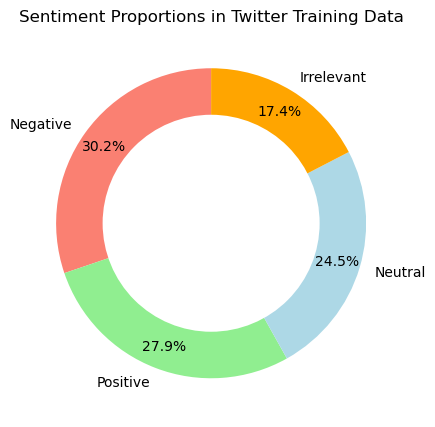

In [109]:
plt.figure(figsize=(5, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, pctdistance=0.85, colors=['salmon','lightgreen', 'lightblue', 'orange'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Sentiment Proportions in Twitter Training Data")
plt.show()

#### Sentiment Distribution by All Entities

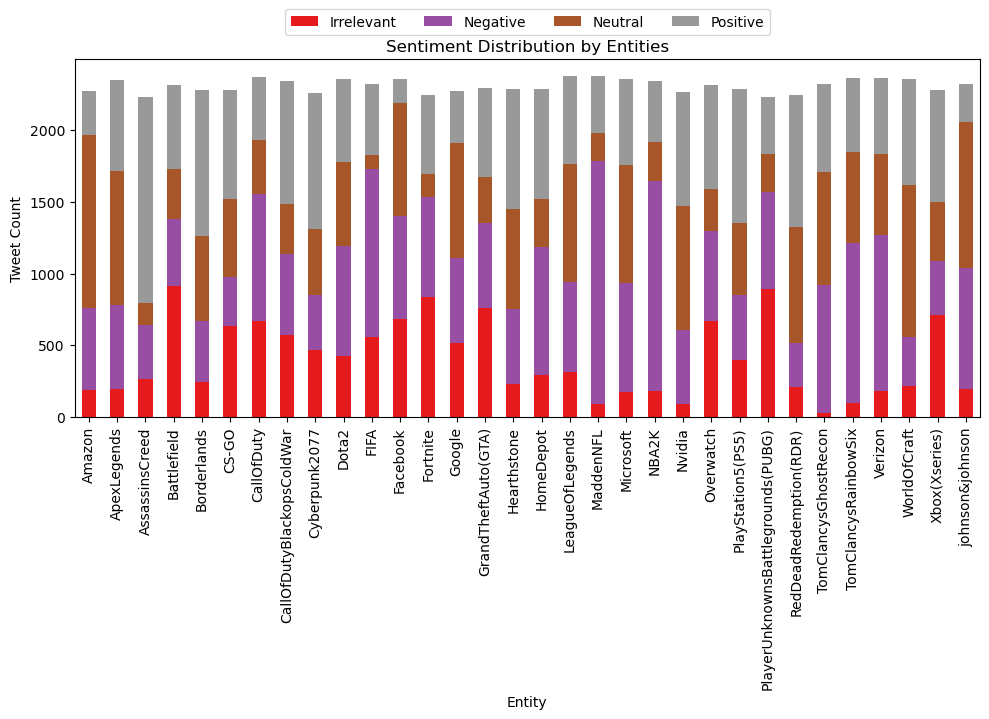

In [97]:
entity_sentiment.plot(kind='bar',stacked=True,cmap='Set1',figsize = (10,7))
plt.xlabel('Entity')
plt.ylabel('Tweet Count')
plt.title("Sentiment Distribution by Entities")
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.show()

#### Sentiment Distribution by Entity (Top 10 Entities)

<Figure size 800x500 with 0 Axes>

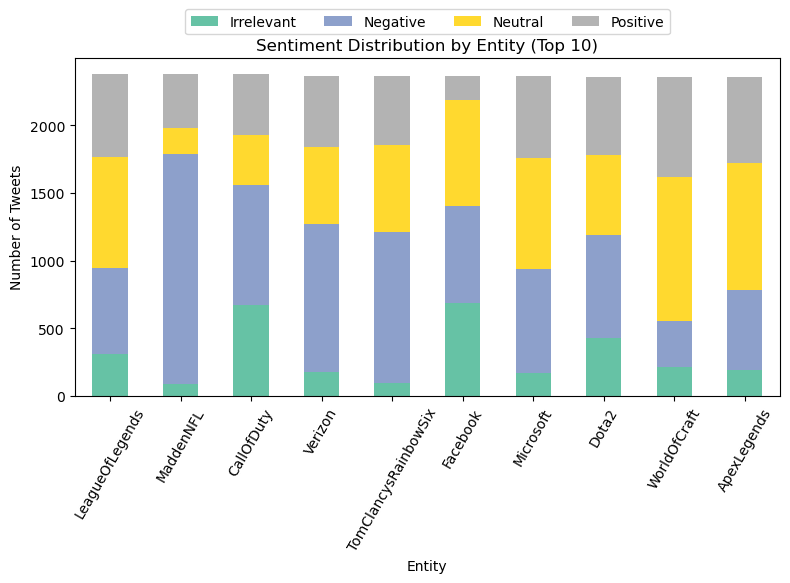

In [105]:
plt.figure(figsize=(8, 5))
entity_sentiment_top.plot(kind='bar', stacked=True, colormap='Set2', figsize=(8, 6))
plt.title("Sentiment Distribution by Entity (Top 10)")
plt.xlabel("Entity")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=60)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05), ncol=4)
plt.tight_layout()
plt.show()

#### Distribution of Sentiment Compound Scores

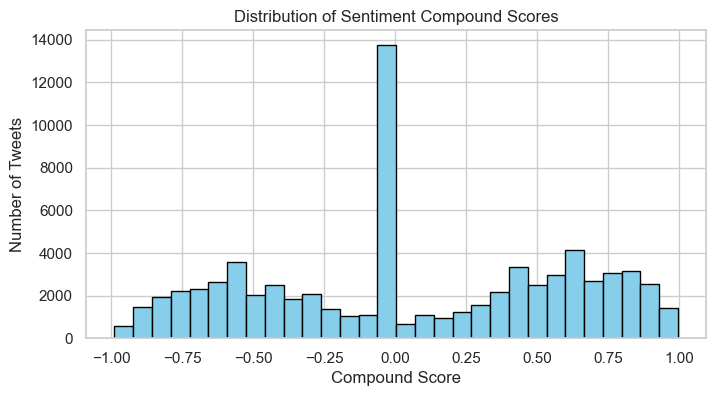

In [170]:
plt.figure(figsize=(8, 4))
plt.hist(twitter['compound'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentiment Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Number of Tweets")
plt.show()

#### Distribution of Sentiment Compound Scores by Entities

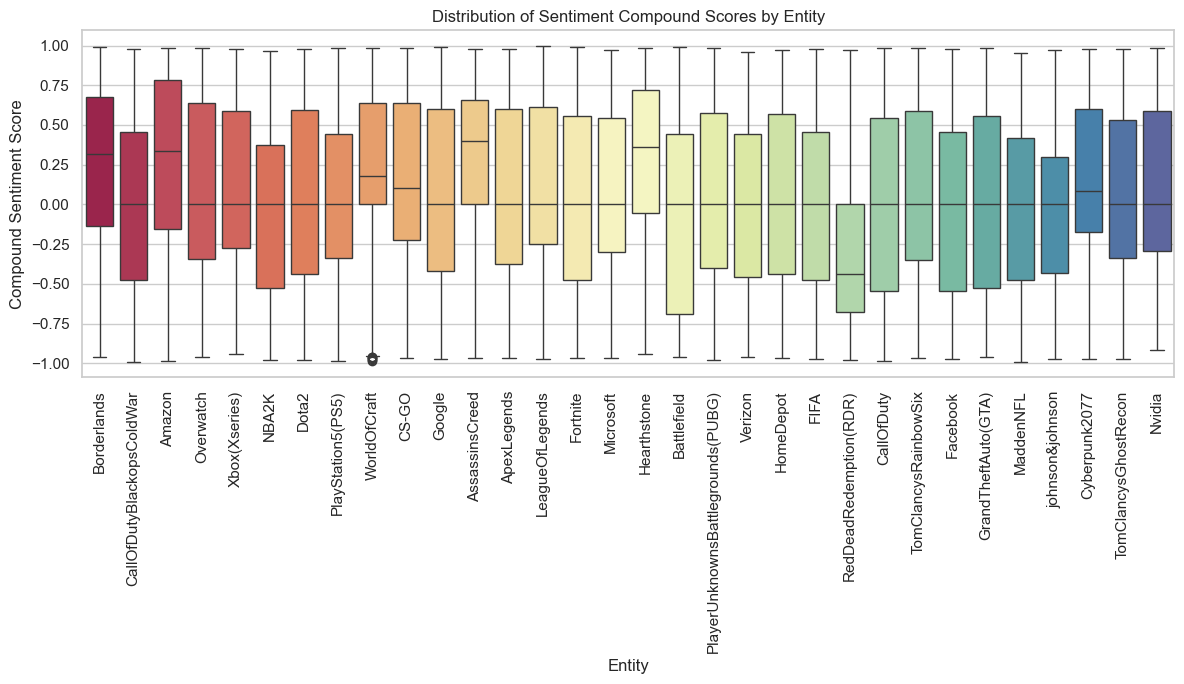

In [151]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=twitter, x='entity', y='compound',palette="Spectral",hue=(twitter['entity'])) # compound scores are calculated above using SentimentIntensityAnalyzer = sia
plt.title("Distribution of Sentiment Compound Scores by Entity")
plt.xlabel("Entity")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Distribution of Sentiment Compound Scores by Top 10 Entities

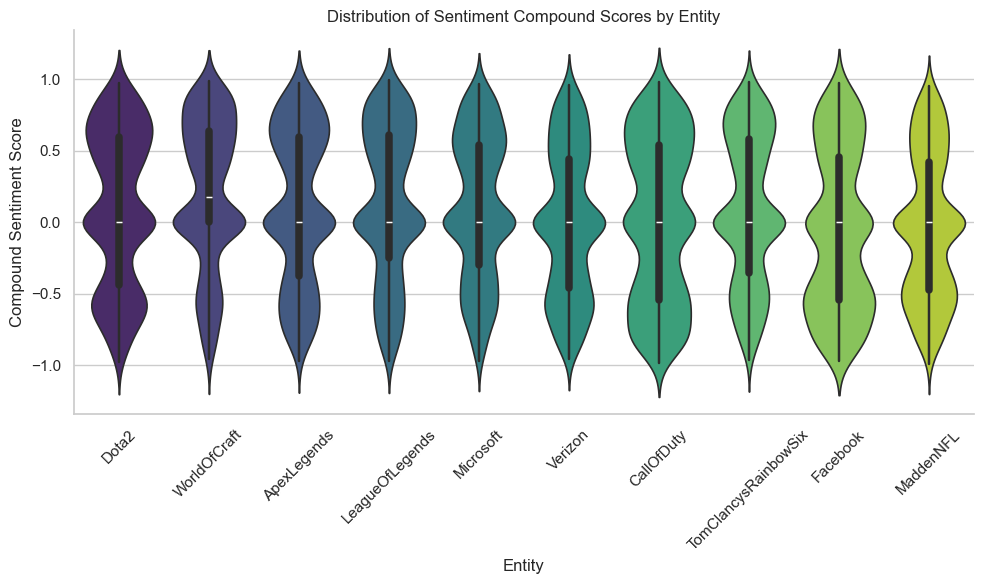

In [162]:
compound_top_entities = twitter[twitter['entity'].isin(top_entities)]

plt.figure(figsize=(10, 6))
sns.violinplot(data=df_top_entities, x='entity', y='compound',palette="viridis",hue=(compound_top_entities['entity']),linewidth=1.2)
plt.title("Distribution of Sentiment Compound Scores by Entity")
plt.xlabel("Entity")
plt.ylabel("Compound Sentiment Score")
plt.xticks(rotation=45)
plt.tight_layout()
sns.despine()
plt.tight_layout()
plt.show()

#### Tweet Length Distribution by Sentiment from the dataset

In [163]:
# Create a new column with tweet lengths
twitter['tweet_length'] = twitter['tweet_text'].apply(lambda x: len(str(x)))

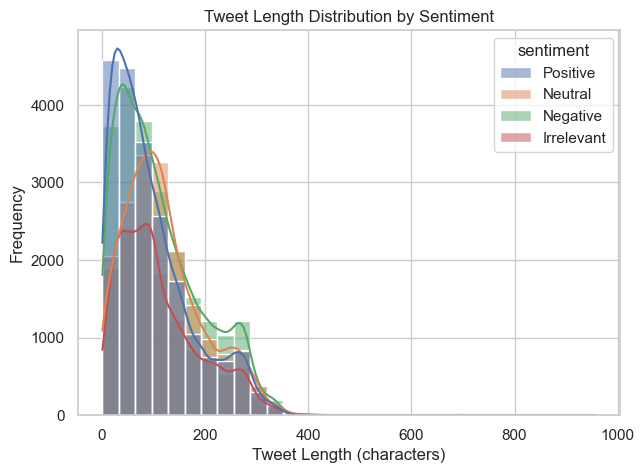

In [171]:
plt.figure(figsize=(7, 5))
sns.histplot(data=twitter, x='tweet_length', hue='sentiment', bins=30, kde=True)
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

## Word Cloud for Sentiments

In [172]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
x = vectorizer.fit_transform(twitter['tweet_text'].astype(str))
mean_tfidf = np.mean(x.toarray(), axis=0)
word_scores = dict(zip(vectorizer.get_feature_names_out(), mean_tfidf))
wc = WordCloud(width=800, height=400, background_color='white')
wc.generate_from_frequencies(word_scores)

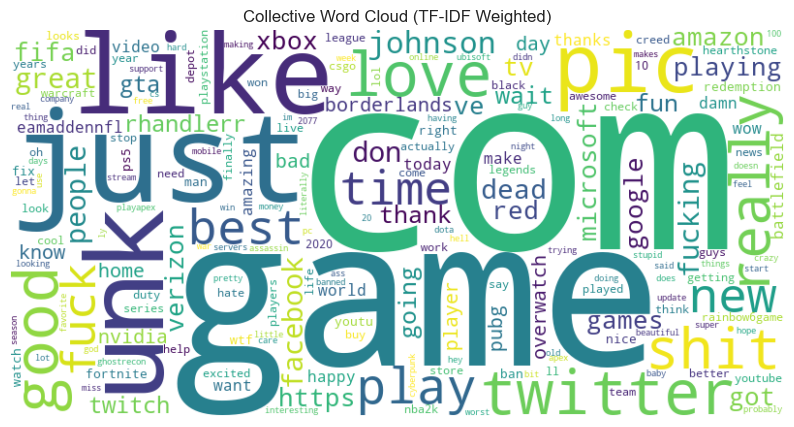

In [173]:
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Collective Word Cloud (TF-IDF Weighted)")
plt.show()

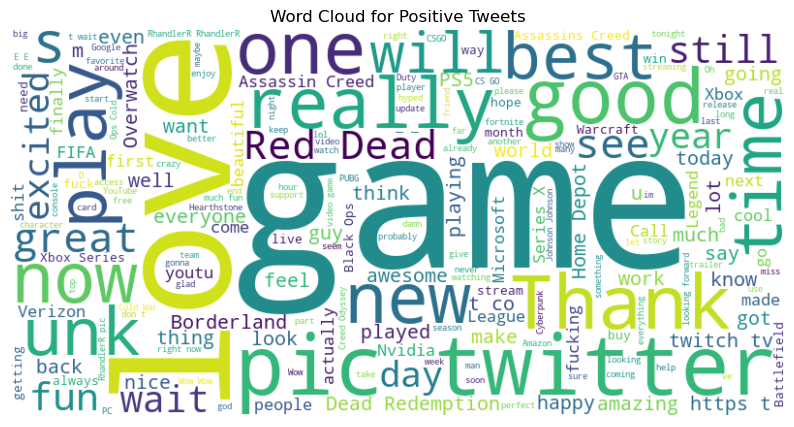

In [31]:
# Word Cloud for Positive Tweets
positive_text = " ".join(twitter[twitter['sentiment'] == 'Positive']['tweet_text'].astype(str))
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Tweets")
plt.show()

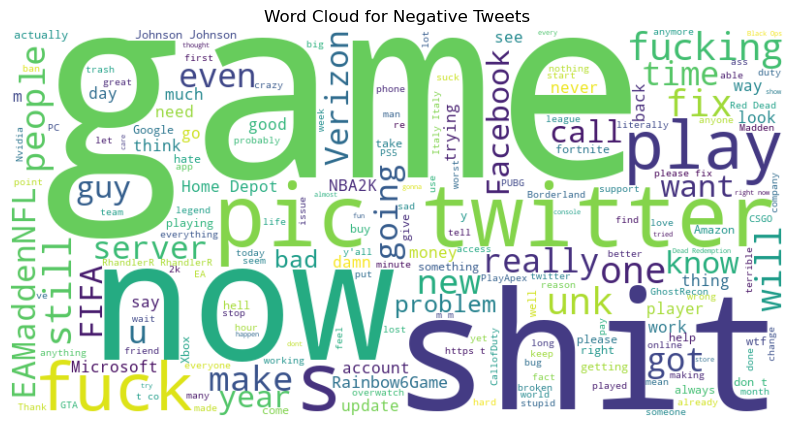

In [32]:
# Word Cloud for Negative Tweets
negative_text = " ".join(twitter[twitter['sentiment'] == 'Negative']['tweet_text'].astype(str))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Tweets")
plt.show()

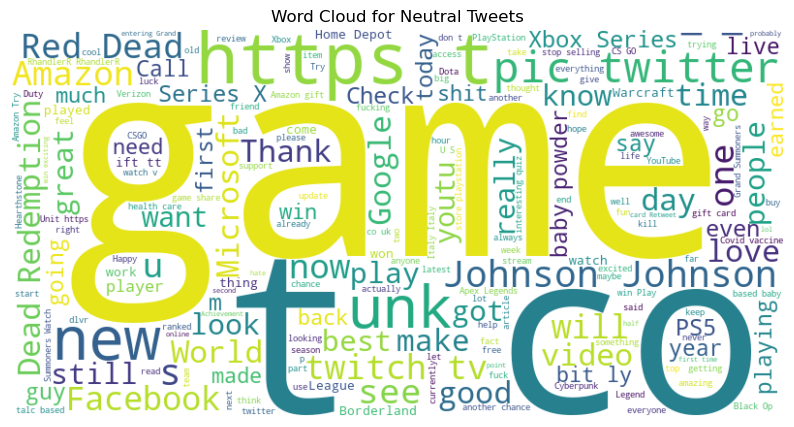

In [33]:
# Word Cloud for Neutral Tweets
neutral_text = " ".join(twitter[twitter['sentiment'] == 'Neutral']['tweet_text'].astype(str))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Neutral Tweets")
plt.show()

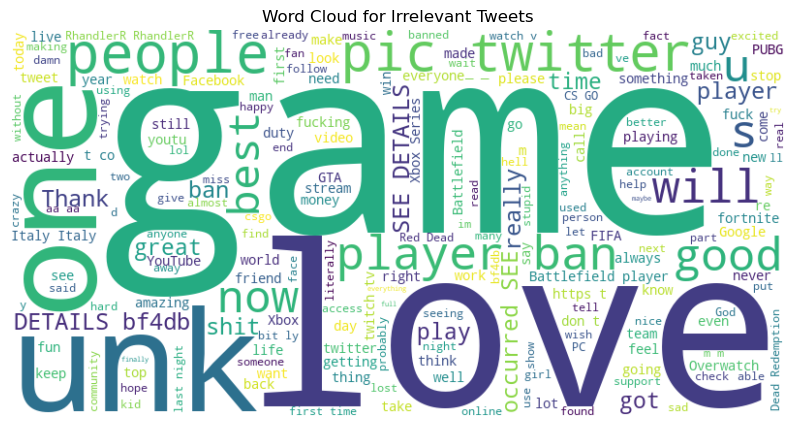

In [34]:
# Word Cloud for Irrelevant Tweets
Irrelevent_text = " ".join(twitter[twitter['sentiment'] == 'Irrelevant']['tweet_text'].astype(str))
wordcloud_Irrelevant = WordCloud(width=800, height=400, background_color='white').generate(Irrelevent_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_Irrelevant, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Irrelevant Tweets")
plt.show()